In [371]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf #TODO

import warnings
warnings.filterwarnings('ignore')

### 분석 개요
    ● 질문 ; 노동자의 시급을 결정하는 요인은?
    ● y : 시급
    ● x : 노동자 or 기업 정보에 대한 변수

In [372]:
!pip3 install wooldridge

In [373]:
import wooldridge as woo
woo.data('wage1', description = True)
wage1 = woo.dataWoo('wage1')

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

In [374]:
wage1.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [375]:
wage1.dtypes

wage        float64
educ          int64
exper         int64
tenure        int64
nonwhite      int64
female        int64
married       int64
numdep        int64
smsa          int64
northcen      int64
south         int64
west          int64
construc      int64
ndurman       int64
trcommpu      int64
trade         int64
services      int64
profserv      int64
profocc       int64
clerocc       int64
servocc       int64
lwage       float64
expersq       int64
tenursq       int64
dtype: object

In [376]:
round(wage1.describe(),2)

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.00,526.00,526.00,526.00,526.0,526.00,526.00,526.00,526.00,526.00,...,526.00,526.00,526.0,526.00,526.00,526.00,526.00,526.00,526.00,526.00
mean,5.90,12.56,17.02,5.10,0.1,0.48,0.61,1.04,0.72,0.25,...,0.04,0.29,0.1,0.26,0.37,0.17,0.14,1.62,473.44,78.15
std,3.69,2.77,13.57,7.22,0.3,0.50,0.49,1.26,0.45,0.43,...,0.20,0.45,0.3,0.44,0.48,0.37,0.35,0.53,616.04,199.43
min,0.53,0.00,1.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,-0.63,1.00,0.00
25%,3.33,12.00,5.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.20,25.00,0.00
50%,4.65,12.00,13.50,2.00,0.0,0.00,1.00,1.00,1.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.54,182.50,4.00
75%,6.88,14.00,26.00,7.00,0.0,1.00,1.00,2.00,1.00,0.75,...,0.00,1.00,0.0,1.00,1.00,0.00,0.00,1.93,676.00,49.00
max,24.98,18.00,51.00,44.00,1.0,1.00,1.00,6.00,1.00,1.00,...,1.00,1.00,1.0,1.00,1.00,1.00,1.00,3.22,2601.00,1936.00


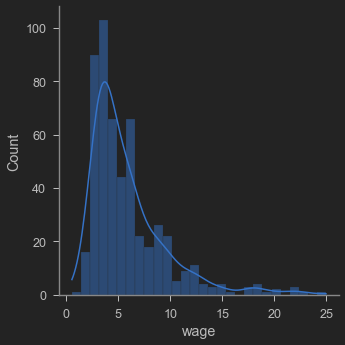

In [377]:
y = wage1['wage']
sns.displot(data=wage1, x='wage', kde=True)
plt.show()

In [378]:
# 변수 이름
xname = 'educ'

In [379]:
# 요약통계량
round(wage1[['wage', xname]].describe(),2)

,wage,educ
count,526.00,526.00
mean,5.90,12.56
std,3.69,2.77
min,0.53,0.00
25%,3.33,12.00
50%,4.65,12.00
75%,6.88,14.00
max,24.98,18.00


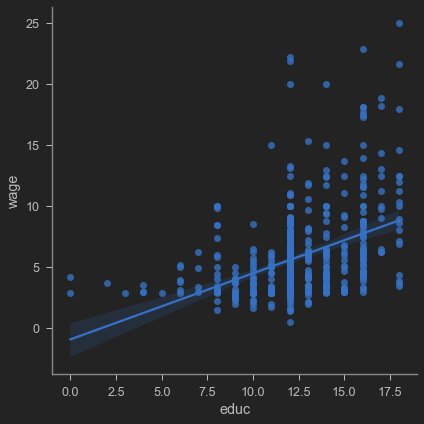

In [380]:
# 산점도(scatter plot)
sns.pairplot(data=wage1, x_vars=[xname], y_vars=['wage'], kind='reg', height=6)
plt.xlim([-1, 19])
plt.show()

In [381]:
# X 변수
X = wage1[xname]
X.head()

0    11
1    12
2    11
3     8
4    12
Name: educ, dtype: int64

In [382]:
# 상수항 추가
X = sm.add_constant(X)
X.head()

,const,educ
0,1.0,11
1,1.0,12
2,1.0,11
3,1.0,8
4,1.0,12


In [383]:
# OLS
model = sm.OLS(y, X) # 모델 객체 생성
results = model.fit() # 추정
print(results.summary()) # 결과 요약 출력

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Tue, 10 May 2022   Prob (F-statistic):           2.78e-22
Time:                        20:28:41   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9049      0.685     -1.321      0.1

In [384]:
# 필요한 결과만 직접 따로 정리해보기
Table = pd.DataFrame({'b': round(results.params, 4),
 'se': round(results.bse, 4),
 't': round(results.tvalues, 4),
 'pval': round(results.pvalues, 4)})
print(f'Table: \n{Table}\n')
print(f'R2: {round(results.rsquared,4)}\n')

Table: 
            b      se        t    pval
const -0.9049  0.6850  -1.3210  0.1871
educ   0.5414  0.0532  10.1667  0.0000

R2: 0.1648



In [385]:
'''
X의 변수에 Education을 지정하였습니다.
이를 바탕으로 단순선형회귀를 사용해보면,
Edcation의 P-value는 0.000으로 Wage에 유의미한 영향을 준다는 것을 알 수 있습니다.
Education이 1 상승할 때마다 Wage는 평균적으로 0.5414만큼(기울기) 증가한다는 것을 알 수 있습니다.
'''

'\nX의 변수에 Education을 지정하였습니다.\n이를 바탕으로 단순선형회귀를 사용해보면,\nEdcation의 P-value는 0.000으로 Wage에 유의미한 영향을 준다는 것을 알 수 있습니다.\nEducation이 1 상승할 때마다 Wage는 평균적으로 0.5414만큼(기울기) 증가한다는 것을 알 수 있습니다.\n'

In [386]:
# 단 한 줄로 OLS 추정 + 결과 출력을 할 수 있다.
print(sm.OLS(y, X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Tue, 10 May 2022   Prob (F-statistic):           2.78e-22
Time:                        20:28:41   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9049      0.685     -1.321      0.1

In [387]:
# formula 방식
print(smf.ols(formula='wage ~ educ', data=wage1).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Tue, 10 May 2022   Prob (F-statistic):           2.78e-22
Time:                        20:28:41   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.1

In [388]:
# x 변수 이름
xname = 'female' # 다른 범주형 변수로 바꿔가며 실행해보자.

In [389]:
# 범주형 변수 그룹별 통계량을 살펴보기 위해 pd.groupby()를 사용
wage1_by_female = wage1.groupby([xname])

In [390]:
# 범주형 그룹별 임금(wage)의 요약 통계량 비교
round(wage1_by_female['wage'].describe(), 1)

,count,mean,std,min,25%,50%,75%,max
female,,,,,,,,
0,274.0,7.1,4.2,1.5,4.1,6.0,8.8,25.0
1,252.0,4.6,2.5,0.5,3.0,3.8,5.5,21.6


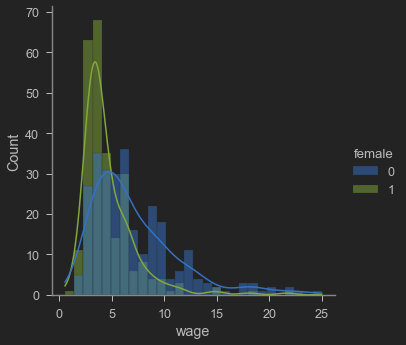

In [391]:
# Histogram
sns.displot(data=wage1, x='wage', hue=xname, kde=True, color='blue')
plt.show()

In [392]:
X = sm.add_constant(wage1[xname]) # X 변수
print(sm.OLS(y, X).fit().summary()) # OLS

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     68.54
Date:                Tue, 10 May 2022   Prob (F-statistic):           1.04e-15
Time:                        20:28:41   Log-Likelihood:                -1400.7
No. Observations:                 526   AIC:                             2805.
Df Residuals:                     524   BIC:                             2814.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0995      0.210     33.806      0.0

In [393]:
'''
이번에는 X의 변수에 female 지정하였습니다.
이를 바탕으로 단순선형회귀를 사용해보면,
Female의 P-value는 0.000으로 Wage에 유의미한 영향을 준다는 것을 알 수 있습니다.
다만 Education과 다른 점은 coef가 (-) 즉, 음의 상관관계를 갖는다는 것을 알 수 있습니다.
Female이 1 상승할 때마다 Wage는 평균적으로 2.5118만큼(기울기) 감소한다는 것을 알 수 있습니다.
'''

'\n이번에는 X의 변수에 female 지정하였습니다.\n이를 바탕으로 단순선형회귀를 사용해보면,\nFemale의 P-value는 0.000으로 Wage에 유의미한 영향을 준다는 것을 알 수 있습니다.\n다만 Education과 다른 점은 coef가 (-) 즉, 음의 상관관계를 갖는다는 것을 알 수 있습니다.\nFemale이 1 상승할 때마다 Wage는 평균적으로 2.5118만큼(기울기) 감소한다는 것을 알 수 있습니다.\n'

In [394]:
X = wage1[['female', 'educ', 'exper', 'tenure']]
X = sm.add_constant(X)
print(sm.OLS(y, X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     74.40
Date:                Tue, 10 May 2022   Prob (F-statistic):           7.30e-50
Time:                        20:28:42   Log-Likelihood:                -1314.2
No. Observations:                 526   AIC:                             2638.
Df Residuals:                     521   BIC:                             2660.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5679      0.725     -2.164      0.0

In [395]:
X = wage1.drop(['wage', 'lwage'], axis=1)
X = sm.add_constant(X)
print(sm.OLS(y, X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     22.12
Date:                Tue, 10 May 2022   Prob (F-statistic):           3.65e-60
Time:                        20:28:42   Log-Likelihood:                -1255.1
No. Observations:                 526   AIC:                             2556.
Df Residuals:                     503   BIC:                             2654.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8034      0.859      0.935      0.3

### 다중공전성(VIF)
VIF는 다중 공선성(Multicollinearity)을 측정하는데 필요한 방법으로
다중공선성이란, 독립변수(feature)간 상관관계가 있는 것을 의미한다.

VIF가 10이 넘으면 다중공선성이 있는 것으로 판단하며 5가 넘더라도 주의를 요한다. 만약 특정 Feature a와 b가 서로 상관 관계가 있다고 했을 때 두 변수 모두 VIF가 높다고 판단한다. 어느 하나만 VIF가 높은 경우는 없다고 생각하면된다.

출처: https://signature95.tistory.com/18 [DataAnalyst]

In [396]:
df.corr() # feature간 상관성이 높게 도출되는 것을 확인할 수 있다.

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
wage,1.000000,0.405903,0.112903,0.346890,-0.038520,-0.340098,0.228817,-0.053760,0.177885,-0.029124,...,0.055940,-0.189848,-0.141624,0.085204,0.441770,-0.140837,-0.253078,0.937062,0.030238,0.267419
educ,0.405903,1.000000,-0.299542,-0.056173,-0.084654,-0.085029,0.068881,-0.215291,0.224309,0.061372,...,0.107736,-0.059204,-0.072659,0.214198,0.496768,-0.008324,-0.163345,0.431053,-0.331256,-0.069106
exper,0.112903,-0.299542,1.000000,0.499291,0.014356,-0.041626,0.316984,-0.056319,-0.117260,0.010588,...,-0.048267,-0.104626,0.041499,-0.020599,-0.005615,-0.040385,-0.071080,0.111373,0.960971,0.422942
tenure,0.346890,-0.056173,0.499291,1.000000,0.011589,-0.197910,0.239889,-0.027037,0.000745,0.014093,...,0.063885,-0.126224,-0.062604,-0.059691,0.090624,-0.072831,-0.112679,0.325538,0.459223,0.921564
nonwhite,-0.038520,-0.084654,0.014356,0.011589,1.000000,-0.010917,-0.062259,0.077701,-0.014147,-0.080201,...,-0.072328,-0.048486,0.094866,-0.056680,-0.088552,-0.034138,-0.028769,-0.038888,0.009348,-0.007203
female,-0.340098,-0.085029,-0.041626,-0.197910,-0.010917,1.000000,-0.166128,0.033148,0.016545,0.015453,...,-0.018964,-0.053351,0.108833,0.215939,-0.177376,0.355233,0.159226,-0.373677,-0.027860,-0.175623
married,0.228817,0.068881,0.316984,0.239889,-0.062259,-0.166128,1.000000,0.154497,-0.097230,-0.011716,...,0.038239,-0.136572,-0.054906,0.064603,0.085544,0.025711,-0.157040,0.270669,0.217289,0.166822
numdep,-0.053760,-0.215291,-0.056319,-0.027037,0.077701,0.033148,0.154497,1.000000,-0.096368,-0.089640,...,-0.014791,0.047992,-0.061708,-0.072145,-0.123401,0.028897,0.055361,-0.095297,-0.130906,-0.056640
smsa,0.177885,0.224309,-0.117260,0.000745,-0.014147,0.016545,-0.097230,-0.096368,1.000000,0.055216,...,0.007973,0.017948,0.010028,0.046049,0.145965,0.107216,-0.030039,0.200124,-0.110918,0.004473
northcen,-0.029124,0.061372,0.010588,0.014093,-0.080201,0.015453,-0.011716,-0.089640,0.055216,1.000000,...,-0.059439,0.020417,-0.062645,0.068810,0.068841,-0.024479,0.043253,-0.015858,0.033540,0.009093


In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df):
    # VIF를 위한 DataFrame 형성
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['Feature'] = df.columns
    
    # VIF 값이 높은 순으로 정렬한다.
    vif = vif.sort_values(by="VIF_Factor", ascending= False)
    vif = vif.reset_index().drop(columns='index')
    return vif

vif = VIF(df)

In [88]:
vif # 기준치 10 이상인 Feature가 6개 확인됨.

,VIF_Factor,Feature
0,74.504580,lwage
1,50.419936,exper
2,29.306654,expersq
3,28.971933,educ
4,25.243082,wage
5,12.949062,tenure
6,8.635373,tenursq
7,4.303122,smsa
8,3.578418,married
9,3.549138,profserv


## 전진선택법 & 후진제거법 & 단계선택법

In [98]:
'''
+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.        |
| profserv | =1 if in prof. serv. indus.     |
| profocc  | =1 if in profess. occupation    |
| clerocc  | =1 if in clerical occupation    |
| servocc  | =1 if in service occupation     |
| lwage    | log(wage)                       |
| expersq  | exper^2                         |
| tenursq  | tenure^2                        |
+----------+---------------------------------+
''';

### 일차적으로 범주형 데이터를 제거하고 진행해보았습니다.

In [309]:
woo.data('wage1', description = True)
df = woo.dataWoo('wage1')

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

In [437]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

class main():
    def __init__(self):
        # p < 0.05로 임계치 설정
        self.PV = 0.05
        
        # 각 단계별 선택된 변수 저장
        self.step = []
        
        # 각 단계별 수정된 결정계수 저장
        self.adj_list = []
        
        # 스탭
        self.steps = []
        self.start_step = 0
        
    # 전진선택법
    def forward(self, X_train, y_train):
        variables =  X_train.columns.tolist()
        
        # 전진선택법이기 때문에 처음에는 비어있는 리스트에서 시작하여 1개 -> 2개 -> ... 증가할 것이다.
        forward_variables = []

        while len(variables) > 0: # 모든 변수를 조작했을 때까지
            remain = list(set(variables) - set(forward_variables)) # 조작을 위해 set으로 각각의 list 설정
            pvalue = pd.Series(index = remain)

            for i in remain:
                X = X_train[forward_variables+[i]]
                X = sm.add_constant(X)
                model = sm.OLS(y_train,X).fit()
                pvalue[i] = model.pvalues[i]
            
            # P-value가 가장 작은 feature부터 포함 여부를 확인한다. 이는 전진선택법의 특성이다.
            # 아래의 후진제거법에서는 모든 특성 변수들 중 P-value가 가장 큰 값부터 소거하는 방식으로 이루어지기 때문에 Max를 사용한다.
            min_pvalue = pvalue.min()
            # 최소 p-value 값이 기준 값(0.05)보다 작으면 포함
            if min_pvalue < self.PV:
                forward_variables.append(pvalue.idxmin())
                while len(forward_variables) > 0:
                    selected_X = X_train[forward_variables]
                    selected_X = sm.add_constant(selected_X)
                    # 절편항의 p-value는 뺀다. ([1:])
                    selected_pvalue = sm.OLS(y_train, selected_X).fit().pvalues[1:]

                    max_pvalue = selected_pvalue.max()
                    # p-value 값의 최댓값이 기준값보다 크가나 같으면 제외
                    if max_pvalue >= self.PV:
                        removed_variable = selected_pvalue.idxmax()
                        forward_variables.remove(removed_variable)
                    else:
                        break

                self.start_step += 1
                self.steps.append(self.start_step)
                adj_rsquare = sm.OLS(y_train, sm.add_constant(X_train[forward_variables])).fit().rsquared_adj
                self.adj_list.append(adj_rsquare)
                self.step.append(forward_variables.copy())
            else:
                break
        return self.adj_list, self.step, self.steps

    # 후진제거법
    def backward(self, X_train, y_train):
        variables = X_train.columns.tolist()        
        initial_list = []
        
        included = variables 
        while True:
            changed=False 
            model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[variables]))).fit()
            # use all coefs except intercept 
            pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함 
            worst_pval = pvalues.max() # P 값이 가장 높은 것 선정 
            if worst_pval > self.PV: 
                changed=True 
                worst_feature = pvalues.idxmax() 
                included.remove(worst_feature) 
            self.start_step += 1 
            self.steps.append(self.start_step) 
            adj_r_squared = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[variables]))).fit().rsquared_adj
            self.adj_list.append(adj_r_squared) 
            self.step.append(included.copy()) 
        
            if not changed: 
                break
                    
        return self.adj_list, self.step, self.steps
    
    # 단계선택법
    def stepwise(self, X_train, y_train):
        variables = X_train.columns.tolist()
        y = y_train
        selected_variables = []
        while len(variables) > 0:
            remain = list(set(variables) - set(selected_variables))
            
            # 변수의 pvalue
            pvalue = pd.Series(index=remain)
            
            # 기존에 포함된 변수와 새로운 변수가 하나씩 들어가면서 모형을 적용한다.
            for col in remain:
                X = X_train[selected_variables+[col]]
                X = sm.add_constant(X)
                model = sm.OLS(y_train,X).fit()
                pvalue[col] = model.pvalues[col]
                
            min_pvalue = pvalue.min()
            
            # 최소 P-value 값이 기준 값보다 작을 때 포함(= 전진선택법)
            if min_pvalue < self.PV:
                selected_variables.append(pvalue.idxmin())
                # 선택된 변수들에 대해서 어떤 변수를 제거한지 고른다
                while len(selected_variables) > 0:
                    selected_X = X_train[selected_variables]
                    selected_X = sm.add_constant(selected_X)
                    # 절편항의 p-value는 뺀다.
                    selected_pvalue = sm.OLS(y, selected_X).fit().pvalues[1:]
                    max_pvalue = selected_pvalue.max() #(= 후진제거법)
                    if max_pvalue >= self.PV:
                        remove_variable = selected_pvalue.idxmax() # 후진제거법과 마찬가지로 가장 큰 P-value 삭제한다.
                        selected_variables.remove(remove_variable)
                    else:
                        break
                self.start_step += 1
                self.steps.append(self.start_step)
                adj_r_squared = sm.OLS(y, sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
                self.adj_list.append(adj_r_squared)
                self.step.append(selected_variables.copy())
            else:
                break
        return self.adj_list, self.step, self.steps
        
    @staticmethod
    def check(df, func):
        new_df = df[['wage', 'educ', 'exper', 'tenure', 'numdep', 'lwage', 'expersq', 'tenursq']]
        y = new_df['wage']
        X = new_df.copy().drop(['wage','lwage'], axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 20)
        X_train = sm.add_constant(X_train)
        
        if func == 'forward':
            adj_list, step, steps = forward(X_train, y_train)
        elif func == 'backward':
            adj_list, step, steps = backward(X_train, y_train)
        elif func == 'stepwise':
            adj_list, step, steps = backward(X_train, y_train)
        else:
            print('None')
        
        # X를 재설정하기 위해 step에서 마지막 최종 값을 가져옴
        X = step[-1].copy()

        
        y = df['wage']
        X = df[forward_X]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 20)

        X_train = sm.add_constant(X_train) # 변수 설정
        model = sm.OLS(y_train, X_train).fit()
        print(model.summary())

        fig = plt.figure(figsize=(10,10))
        plt.xticks(steps, [f'step {s}\n'+'\n'.join(step[i]) for i,s in enumerate(steps)])
        plt.plot(steps, adj_list)
        plt.show()
        
# 전진선택법과 후진제거법, 단계선택법 모두에서 model을 위해 사용되기 때문에 중복을 방지하기 위해 check()라는 함수를 만듦.
# 범주형 데이터를 제거한 df
# 범주형 데이터를 포함한 df
def check_2():
    new_df = df
    y = new_df['wage']
    X = new_df.copy().drop(['wage','lwage'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 20)
    X_train = sm.add_constant(X_train)
    
    
    
    return X_train, y_train

In [438]:
aa = main()
new_df = df[['wage', 'educ', 'exper', 'tenure', 'numdep', 'lwage', 'expersq', 'tenursq']]
aa.check(df, 'forward')

     tenure
344      11
385       4
367       0
148       5
399       2
..      ...
218       0
223       4
271       1
474      14
355       0

[420 rows x 1 columns]
     tenursq
344      121
385       16
367        0
148       25
399        4
..       ...
218        0
223       16
271        1
474      196
355        0

[420 rows x 1 columns]
     educ
344    11
385    12
367    14
148    16
399    16
..    ...
218     9
223    12
271    16
474    12
355    11

[420 rows x 1 columns]
     const
344    1.0
385    1.0
367    1.0
148    1.0
399    1.0
..     ...
218    1.0
223    1.0
271    1.0
474    1.0
355    1.0

[420 rows x 1 columns]
     numdep
344       2
385       0
367       3
148       3
399       1
..      ...
218       1
223       2
271       0
474       0
355       1

[420 rows x 1 columns]
     expersq
344      169
385       16
367      169
148      400
399       36
..       ...
218      841
223      400
271        1
474     1369
355        1

[420 rows x 1 columns]
    

TypeError: can only join an iterable

<Figure size 720x720 with 0 Axes>

## 전진선택법 결과(Summary & Plot)

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     64.80
Date:                Tue, 10 May 2022   Prob (F-statistic):           2.15e-34
Time:                        21:11:53   Log-Likelihood:                -1041.0
No. Observations:                 420   AIC:                             2090.
Df Residuals:                     416   BIC:                             2106.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2268      0.654     -3.402      0.0

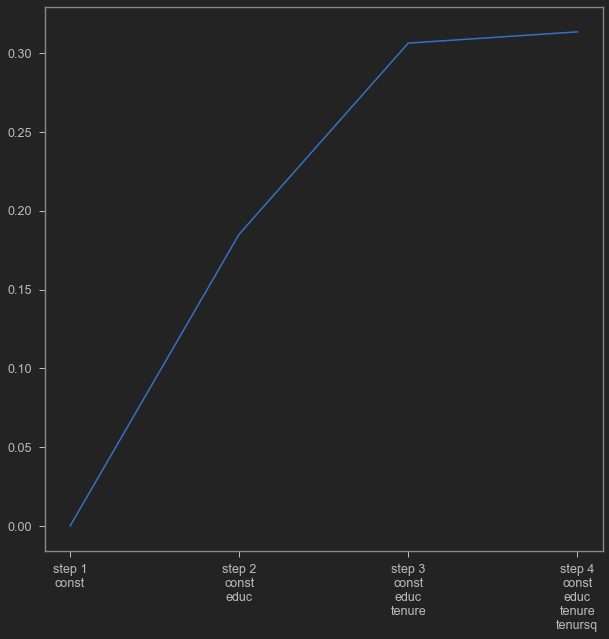

In [412]:
# forward_result를 main의 객체로 설정한다.
forward_result = main()
X_train, y_train = check()

adj_list, step, steps = forward_result.forward(X_train, y_train)

forward_X = step[-1].copy() 
forward_





## 후진제거법 결과(Summary & Plot)

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     53.49
Date:                Tue, 10 May 2022   Prob (F-statistic):           2.43e-36
Time:                        21:11:54   Log-Likelihood:                -1034.2
No. Observations:                 420   AIC:                             2078.
Df Residuals:                     415   BIC:                             2099.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1518      0.749     -4.208      0.0

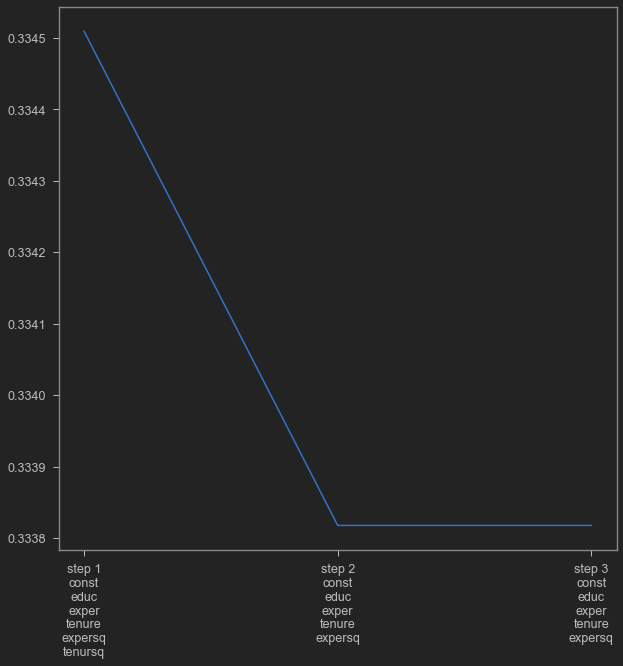

In [413]:
# backward_result를 main의 객체로 설정
backward_result = main()
X_train, y_train = check()

adj_list, step, steps = backward_result.backward(X_train, y_train)

# 후진제거법을 사용한 결과 도출된 유의미한 feature만으로 다시 model을 구성한다.
backward_X = step[-1].copy() # X를 재설정하기 위해 step에서 마지막 최종 값을 가져옴
backward_X.remove('const')   # const를 제거함

y = df['wage']
X = df[backward_X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 20)

X_train = sm.add_constant(X_train) # 변수 설정
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

fig = plt.figure(figsize=(10,10))
plt.xticks(steps, [f'step {s}\n'+'\n'.join(step[i]) for i,s in enumerate(steps)])
plt.plot(steps, adj_list)
plt.show()

## 단계선택법 결과(Summary & Plot)

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     53.49
Date:                Tue, 10 May 2022   Prob (F-statistic):           2.43e-36
Time:                        21:11:55   Log-Likelihood:                -1034.2
No. Observations:                 420   AIC:                             2078.
Df Residuals:                     415   BIC:                             2099.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1518      0.749     -4.208      0.0

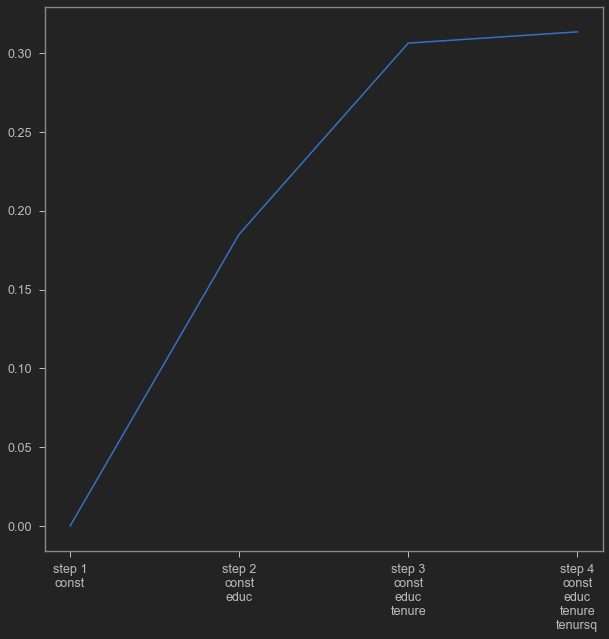

In [414]:
# stepwise_result를 main의 객체로 설정
stepwise_result = main()
X_train, y_train = check()

adj_list, step, steps = stepwise_result.stepwise(X_train, y_train)

# 단계선택법을 사용한 결과 도출된 유의미한 feature만으로 다시 model을 구성한다.
stepwise_X = step[-1].copy() # X를 재설정하기 위해 step에서 마지막 최종 값을 가져옴
stepwise_X.remove('const')   # const를 제거함

y = df['wage']
X = df[backward_X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 20)

X_train = sm.add_constant(X_train) # 변수 설정
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

fig = plt.figure(figsize=(10,10))
plt.xticks(steps, [f'step {s}\n'+'\n'.join(step[i]) for i,s in enumerate(steps)])
plt.plot(steps, adj_list)
plt.show()

### 다음으로 범주형 데이터를 포함하고 진행해보았습니다.

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     43.53
Date:                Tue, 10 May 2022   Prob (F-statistic):           6.65e-46
Time:                        21:12:21   Log-Likelihood:                -1005.3
No. Observations:                 420   AIC:                             2027.
Df Residuals:                     412   BIC:                             2059.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9695      0.709      1.366      0.1

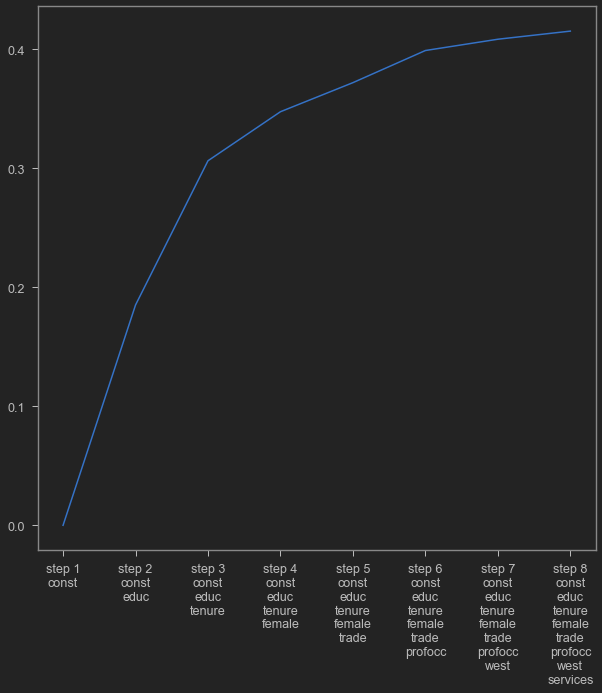

In [417]:
# forward_result를 main의 객체로 설정한다.
forward_result = main()
X_train, y_train = check_2()

adj_list, step, steps = forward_result.forward(X_train, y_train)

forward_X = step[-1].copy() # X를 재설정하기 위해 step에서 마지막 최종 값을 가져옴
forward_X.remove('const')   # const를 제거함

y = df['wage']
X = df[forward_X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 20)

X_train = sm.add_constant(X_train) # 변수 설정
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

fig = plt.figure(figsize=(10,10))
plt.xticks(steps, [f'step {s}\n'+'\n'.join(step[i]) for i,s in enumerate(steps)])
plt.plot(steps, adj_list)
plt.show()